# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/kimberlyliu/Downloads/DS 3001/linearModels/lab/data/cars_hw.csv')
data.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [ ]:
#EDA
data.describe()

if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

# The column 'No_of_Owners' is already numeric, so no need for conversion
data['No_of_Owners'] = data['No_of_Owners'].astype(str).str.extract('(\d+)').astype(int)

data['Make_Year'] = data['Make_Year'].astype(int)
print(data.isnull().sum())

data.describe()

data.head()


Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/27/qjg_wpwd1pn4vm80vy6njqmw0000gn/T/ipykernel_62880/3684001986.py:8: SyntaxWarning: invalid escape sequence '\d'
  data['No_of_Owners'] = data['No_of_Owners'].astype(str).str.extract('(\d+)').astype(int)


,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


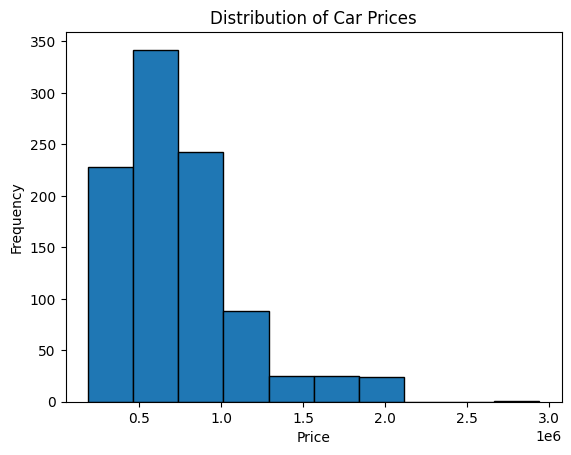

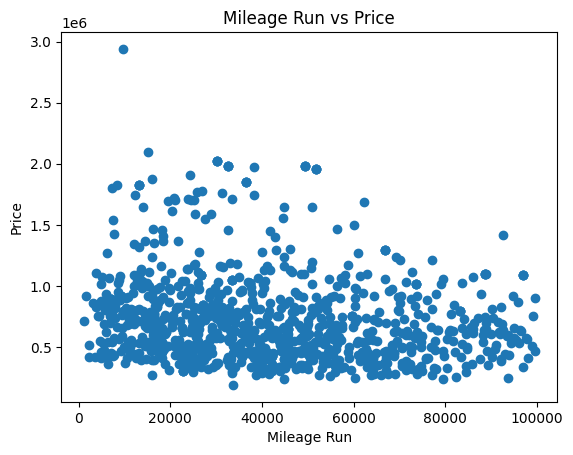

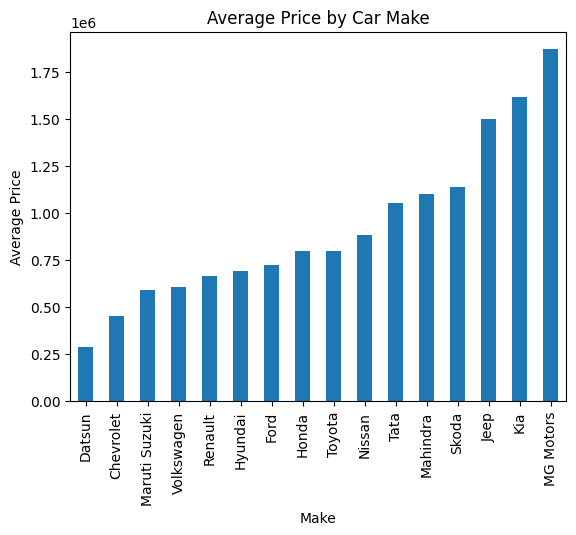

<Figure size 640x480 with 0 Axes>

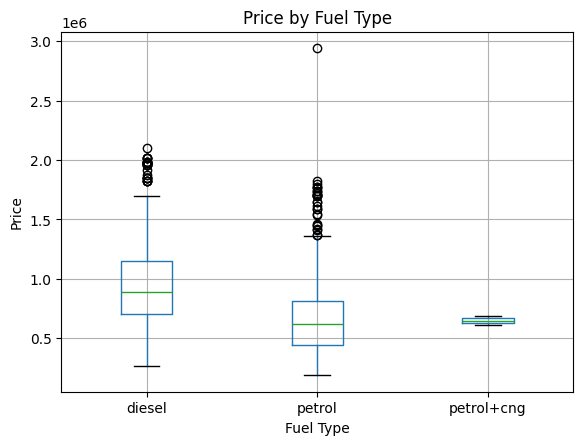

In [10]:
# Visualization 
import matplotlib.pyplot as plt

# Distribution of price 
plt.figure()
plt.hist(data['Price'], bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

# Scatterplot : mileage vs price
plt.figure()
plt.scatter(data['Mileage_Run'], data['Price'])
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.title('Mileage Run vs Price')
plt.show()

#  Bar Plot: Average Price by Car Make
plt.figure()
avg_price_by_make = data.groupby('Make')['Price'].mean().sort_values()
avg_price_by_make.plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.show()

# Boxplot: price by fuel type 
plt.figure()
data.boxplot(column='Price', by='Fuel_Type')
plt.title('Price by Fuel Type')
plt.suptitle('')  # Remove the automatic suptitle for clarity
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


In [ ]:
# List of categorical columns to transform
categorical_columns = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']

# Convert categorical columns to dummy/indicator variables using one-hot encoding.
# drop_first=True helps prevent the dummy variable trap by dropping the first category.
data_transformed = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

X = data_transformed.drop('Price', axis=1)
y = data_transformed['Price']

# Display the first few rows of the transformed data
print(data_transformed.head())

   Make_Year  Mileage_Run  No_of_Owners  Seating_Capacity   Price  \
0       2017        44611             1                 5  657000   
1       2016        20305             1                 5  682000   
2       2019        29540             2                 5  793000   
3       2017        35680             1                 5  414000   
4       2017        25126             1                 5  515000   

   Make_Datsun  Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  \
0        False      False       False         False      False  ...   
1        False      False       False          True      False  ...   
2        False      False        True         False      False  ...   
3        False      False       False         False      False  ...   
4        False      False       False          True      False  ...   

   Body_Type_muv  Body_Type_sedan  Body_Type_suv  Fuel_Type_petrol  \
0          False             True          False             False   
1          False  

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model 1: Using only Mileage_Run
model1 = LinearRegression()
X_train_m1 = X_train[['Mileage_Run']]
X_test_m1 = X_test[['Mileage_Run']]
model1.fit(X_train_m1, y_train)

# Predictions for Model 1
y_train_pred1 = model1.predict(X_train_m1)
y_test_pred1 = model1.predict(X_test_m1)

# Evaluation Metrics for Model 1
rmse_train_m1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
r2_train_m1 = r2_score(y_train, y_train_pred1)
rmse_test_m1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_test_m1 = r2_score(y_test, y_test_pred1)

# Model 2: Using Mileage_Run and Make_Year
model2 = LinearRegression()
X_train_m2 = X_train[['Mileage_Run', 'Make_Year']]
X_test_m2 = X_test[['Mileage_Run', 'Make_Year']]
model2.fit(X_train_m2, y_train)

# Predictions for Model 2
y_train_pred2 = model2.predict(X_train_m2)
y_test_pred2 = model2.predict(X_test_m2)

# Evaluation Metrics for Model 2
rmse_train_m2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
r2_train_m2 = r2_score(y_train, y_train_pred2)
rmse_test_m2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
r2_test_m2 = r2_score(y_test, y_test_pred2)

# Model 3: Using all features (transformed data)
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Predictions for Model 3
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

# Evaluation Metrics for Model 3
rmse_train_m3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
r2_train_m3 = r2_score(y_train, y_train_pred3)
rmse_test_m3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))
r2_test_m3 = r2_score(y_test, y_test_pred3)

print("Model 1 (Mileage_Run):")
print("Train RMSE:", rmse_train_m1)
print("Train R2:", r2_train_m1)
print("Test RMSE:", rmse_test_m1)
print("Test R2:", r2_test_m1)

print("\nModel 2 (Mileage_Run + Make_Year):")
print("Train RMSE:", rmse_train_m2)
print("Train R2:", r2_train_m2)
print("Test RMSE:", rmse_test_m2)
print("Test R2:", r2_test_m2)

print("\nModel 3 (All features):")
print("Train RMSE:", rmse_train_m3)
print("Train R2:", r2_train_m3)
print("Test RMSE:", rmse_test_m3)
print("Test R2:", r2_test_m3)


Model 1 (Mileage_Run):
Train RMSE: 369437.23206086224
Train R2: 0.022185952432653644
Test RMSE: 330349.98245800147
Test R2: 0.048514305445613526

Model 2 (Mileage_Run + Make_Year):
Train RMSE: 310695.03696680197
Train R2: 0.30841816034396285
Test RMSE: 283873.7282090546
Test R2: 0.2974065608266654

Model 3 (All features):
Train RMSE: 142154.19343476938
Train R2: 0.8552247578997084
Test RMSE: 143815.3027671905
Test R2: 0.8196717007174015


Model 3 performs the best because of the substantially low RMSE and high R^2 value

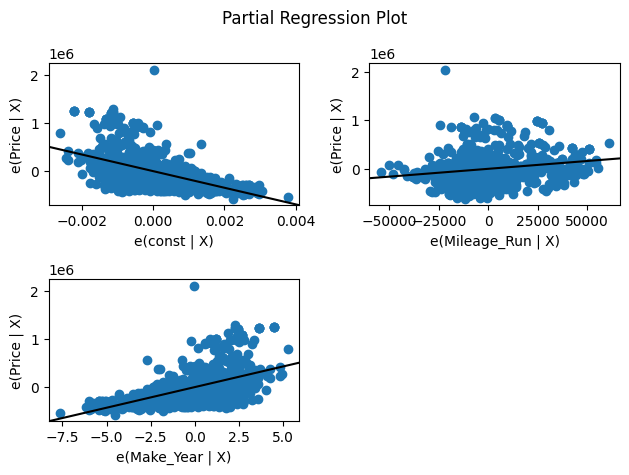

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X_cont = X_train[['Mileage_Run', 'Make_Year']]
X_cont_const = sm.add_constant(X_cont)

# Fit the model on the continuous variables.
model_cont = sm.OLS(y_train, X_cont_const).fit()

# Generate partial regression plots for each predictor.
fig = sm.graphics.plot_partregress_grid(model_cont)
plt.tight_layout()
plt.show()


In the mileage vs price, the data is scattered around a downward sloping line but there is no pronounced curvature that deviates from the linear relationship. In the make year vs price, there is also a linear upward trend with no systematic curvature. Overall, there is not a significant non-linearity.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data_transformed['Mileage_Run_sq'] = data_transformed['Mileage_Run'] ** 2
data_transformed['Mileage_MakeYear_interaction'] = data_transformed['Mileage_Run'] * data_transformed['Make_Year']

X = data_transformed.drop('Price', axis=1)
y = data_transformed['Price']

# Create an ~80/~20 train-test split (using the same random state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Build and fit the complex linear regression model
model_complex = LinearRegression()
model_complex.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)

# Calculate performance metrics for the complex model
rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
r2_train_complex = r2_score(y_train, y_train_pred_complex)
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
r2_test_complex = r2_score(y_test, y_test_pred_complex)

print("Complex Model Performance:")
print("Train RMSE:", rmse_train_complex)
print("Train R2:", r2_train_complex)
print("Test RMSE:", rmse_test_complex)
print("Test R2:", r2_test_complex)


Complex Model Performance:
Train RMSE: 141771.37509352306
Train R2: 0.8560034615131229
Test RMSE: 143399.09796401236
Test R2: 0.8207139389157304


While both Model 1 and Model 2 have much poorer performance, Model 3 dramatically improves prediction accuracy. The complex model, which incorporates transformations and interactions, shows only marginal improvements over Model 3. This indicates that most of the predictive power is already captured by the main effects in Model 3, and the additional complexity in the complex model does little to further improve the fit.

We started by cleaning the dataset and producing visualizations and finding potential relationships by partial correlation plots. Model 1 and Model 2 sufferred from underfitting as shown by our low R^2 value and high RMSE. I built a more complex model by using a squared term for the Mileage_Run and interaction term between Mileage_Run and Make_Year to capture any non-linear effects or variable interactions. The complex model's performance was nearly identical to Model 3, with a R^2 of 0.821 and slightly lower RMSE. By comparing models of varying complexity, we learned that while a simple model might underfit and fail to capture the true relationships, a more inclusive model (Model 3) substantially improves predictive performance. However, further increasing complexity (with transformations and interactions) only marginally enhanced performance, reinforcing the idea that model selection should balance complexity with generalization. The test set performance is crucial for ensuring that any improvements are genuine and not just artifacts of overfitting.